# Exercise 11-1: Create a multiple regression

## Import the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
# read the info.txt file and rename the Length columns so they're more descriptive

fish.rename(columns={'Length1':'VerticalLength', 
                     'Length2':'DiagonalLength', 
                     'Length3':'CrossLength'}, inplace=True)

## Identify a correlation

In [5]:
# get the correlation data for the Weight column

# old code
# fish.corr()[['Weight']]
# fixed by calling corr() with numeric data only

fish_numeric = fish[['Weight','VerticalLength','DiagonalLength','CrossLength','Height','Width']]
fish_numeric.corr()[['Weight']]

,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


<Axes: >

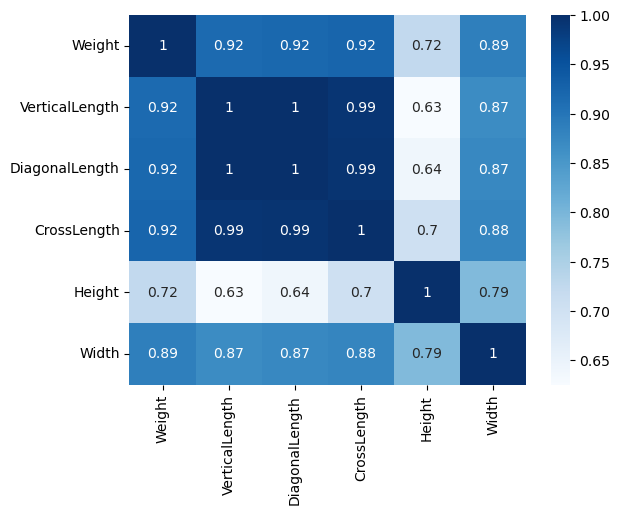

In [6]:
# create a heatmap for the correlation data

sns.heatmap(data=fish_numeric.corr(), annot=True, cmap='Blues')

## Create a multiple regression model

In [7]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream

bream = fish.query('Species == "Bream"')

In [8]:
# split the training and test data 

x_train, x_test, y_train, y_test = train_test_split(
    bream[['Height','Width','VerticalLength']], 
    bream[['Weight']])

In [9]:
# create the model and fit the training data

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# score the testing data
model.score(x_test, y_test)


0.9167506897033315

In [11]:
# make the predictions
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])


In [12]:
# join the predicted data with the original data

final = predicted.join([x_test.reset_index(drop=True), 
                       y_test.reset_index(drop=True)])

## Plot the residuals

In [13]:
# calculate the residuals and store them in a column

final['Residual'] = final.Weight - final.PredictedWeight

<Axes: xlabel='Residual', ylabel='Density'>

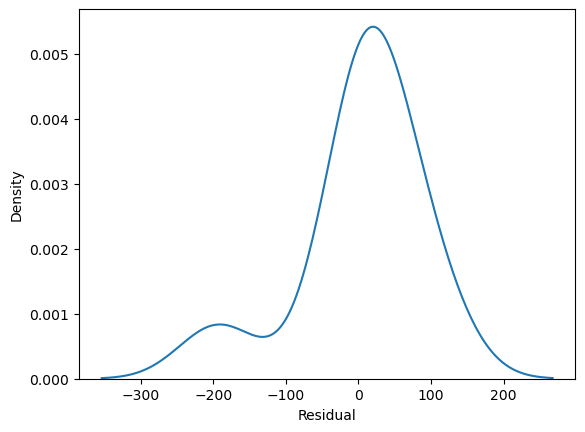

In [14]:
# create a KDE plot for the residuals

sns.kdeplot(data=final, x='Residual')